## Ploting de gráfico

Plotando gráfico da equação
$$
\frac{H²}{H_0²} = \frac{\Omega_{r,0}}{a^4}+ \frac{\Omega_{m,0}}{a³} + \Omega_{\Lambda , 0} + \frac{(1-\Omega_{0})}{a²}
$$

tal que

$$
a = 1+z
$$

In [44]:
#Pré configuração para gráfico

%matplotlib inline
%config InlineBackend.figure_format = 'svg'





#Bibliotecas para plotting
import matplotlib
import matplotlib.pyplot as plt
from scipy import integrate as  itg
import numpy as np
import pandas as pd
import math
import warnings
from scipy.stats import chisquare
from scipy.stats import norm
import scipy.optimize as opt
from scipy.optimize import minimize

exp = np.exp
pi = np.pi
ln = np.log


k2 = 8*np.pi*6.67e-11

#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#Definindo a função

def omega_m(lna):
    H0 = 67.66
    O_m = .306*(H0**2) * (exp(-3*lna)) * (H(lna)**-2)
    return O_m

def Omega_m(z):
    #Omega_m0 = 0.311
    Om_0 = Omega_m0*(1+z)**3
    return Om_0

def H_LCDM(z, Omega_m0):
    #c = 3 * 10**(8)
    #k = -1
    #Omega_L = 0.679
    Omega_k0 = 0
    Omega_L = 1 - Omega_m0
    #Omega_k0 = - k /(c**2) 
    #Omega_k0 = -0.6
    Omega_r0 = 0
    #Omega_L = 0.679
    #Omega_m0 = 0.311
    H0 = 67.66
    H_LCDM = H0*(Omega_L + Omega_k0 * (1+z)**2 + Omega_m0* (1+z)**3 + Omega_r0*(1+z)**4)**(1/2) 
    return H_LCDM


    
def H_Novo(z, Omega_m0, alpha):
    H0 = 67.66
    #Omega_L = 0.67
    
    Omega_L = 1 - Omega_m0
    
    #A = (1+z)**(alpha - 3)
    #H_Novo = H0**(Omega_m0*A + ((Omega_m0*alpha*A)/(3 - alpha))- ((Omega_m0*alpha)/(3 - alpha))+Omega_L)**(1/2)
    H_Novo = H0*(Omega_m0*((1 + z)**(-alpha + 3) + (alpha/(3 - alpha)*((1 + z)**(-alpha + 3)-1))) + Omega_L)**(1/2)
    return H_Novo


def H_LCDM1(z1, H01, Omega_m01, Omega_L1):
    #c = 3 * 10**(8)
    #k = -1
    #Omega_L1 = 0.679
    Omega_k01 = 1 - Omega_m01 - Omega_L1
    #Omega_k0 = - k /(c**2) 
    #Omega_k0 = -0.6
    Omega_r01 = 0
    #Omega_L = 0.679
    #Omega_m0 = 0.311
    #H0 = 67.66
    H_LCDM1 = H01*(Omega_L1 + Omega_k01 * (1+z1)**2 + Omega_m01* (1+z1)**3 + Omega_r01*(1+z1)**4)**(1/2) 
    return H_LCDM1

def H_LCDM_Free(z, H0, Omega_m0):
    #c = 3 * 10**(8)
    #k = -1
    #Omega_L = 0.679
    Omega_k0 = 0
    Omega_L = 1 - Omega_m0
    #Omega_k0 = - k /(c**2) 
    #Omega_k0 = -0.6
    Omega_r0 = 0
    #Omega_L = 0.679
    #Omega_m0 = 0.311
    #H0 = 67.66
    H_LCDMf = H0*(Omega_L + Omega_k0 * (1+z)**2 + Omega_m0* (1+z)**3 + Omega_r0*(1+z)**4)**(1/2) 
    return H_LCDMf

def H_Novo_Free(z, H0, Omega_m0, alpha):
    #H0 = 67.66
    #Omega_L = 0.67
    
    Omega_L = 1 - Omega_m0
    
    #A = (1+z)**(alpha - 3)
    #H_Novo = H0**(Omega_m0*A + ((Omega_m0*alpha*A)/(3 - alpha))- ((Omega_m0*alpha)/(3 - alpha))+Omega_L)**(1/2)
    H_Novof = H0*(Omega_m0*((1 + z)**(-alpha + 3) + (alpha/(3 - alpha)*((1 + z)**(-alpha + 3)-1))) + Omega_L)**(1/2)
    return H_Novof


print(H_LCDM(0, 0.311))
print(H_Novo(0, 0.311, 0))
print(H_LCDM1(0, 67.66, 0.311, 0.679))
print(H_LCDM_Free(0, 67.66, 0.311))
print(H_Novo_Free(0, 67.66, 0.311, 0))
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

67.66
67.66
67.66
67.66
67.66


         z      H  error_H
0   0.0700   69.0     19.6
1   0.0900   69.0     12.0
2   0.1200   68.6     26.2
3   0.1700   83.0      8.0
4   0.1790   75.0      4.0
5   0.1990   75.0      5.0
6   0.2000   72.9     29.6
7   0.2700   77.0     14.0
8   0.2800   88.8     36.6
9   0.3520   83.0     14.0
10  0.3802   83.0     13.5
11  0.4000   95.0     17.0
12  0.4004   77.0     10.2
13  0.4247   87.1     11.2
14  0.4497   92.8     12.9
15  0.4700   89.0     49.6
16  0.4783   80.9      9.0
17  0.4800   97.0     62.0
18  0.5930  104.0     13.0
19  0.6800   92.0      8.0
20  0.7810  105.0     12.0
21  0.8750  125.0     17.0
22  0.8800   90.0     40.0
23  0.9000  117.0     23.0
24  1.0370  154.0     20.0
25  1.3000  168.0     17.0
26  1.3630  160.0     33.6
27  1.4300  177.0     18.0
28  1.5300  140.0     14.0
29  1.7500  202.0     40.0
30  1.9650  186.5     50.4


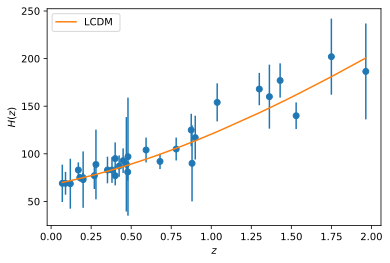

In [45]:
#Inserindo Arquivo .CSV

myfile_H = pd.read_csv(r'/home/cordoeira/Documentos/Dados_Planck/H(z).txt', header = None,sep='\s\s+',engine='python')

myfile_H.columns = ['z','H','error_H']

Hdata = pd.DataFrame(myfile_H)
print(Hdata)

fig1 = plt.figure()
xdata = Hdata["z"]
ydata = Hdata["H"]
errordata = Hdata["error_H"]
plt.scatter(xdata, ydata)
plt.errorbar(xdata, ydata, errordata, linestyle = "None")
#plt.plot(xdata, H_z(xdata, 67.36, 0.311))
plt.plot(xdata, H_LCDM(xdata, 0.311))
#plt.plot(xdata, H_LCDM(xdata, 0.2))
#plt.plot(xdata, H_LCDM(xdata, 0.4))
#plt.title('$H_0$ = 67.36, $\Omega_{m0} = 0.311$, $\lambda$ = 0.1')
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.legend(["LCDM "],loc = "upper left")
#fig = plt.gcf()
plt.show()
#fig1.savefig("H(z)_data.png")
#plt.savefig('H(z)_data.png', format = 'png')
#print("figuraH")


         z      H  error_H
0   0.0700   69.0     19.6
1   0.0900   69.0     12.0
2   0.1200   68.6     26.2
3   0.1700   83.0      8.0
4   0.1790   75.0      4.0
5   0.1990   75.0      5.0
6   0.2000   72.9     29.6
7   0.2700   77.0     14.0
8   0.2800   88.8     36.6
9   0.3520   83.0     14.0
10  0.3802   83.0     13.5
11  0.4000   95.0     17.0
12  0.4004   77.0     10.2
13  0.4247   87.1     11.2
14  0.4497   92.8     12.9
15  0.4700   89.0     49.6
16  0.4783   80.9      9.0
17  0.4800   97.0     62.0
18  0.5930  104.0     13.0
19  0.6800   92.0      8.0
20  0.7810  105.0     12.0
21  0.8750  125.0     17.0
22  0.8800   90.0     40.0
23  0.9000  117.0     23.0
24  1.0370  154.0     20.0
25  1.3000  168.0     17.0
26  1.3630  160.0     33.6
27  1.4300  177.0     18.0
28  1.5300  140.0     14.0
29  1.7500  202.0     40.0
30  1.9650  186.5     50.4


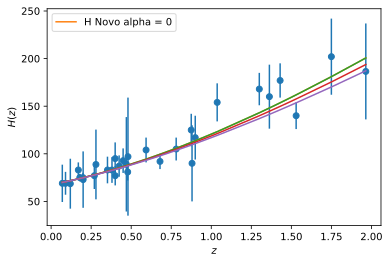

In [21]:
#Inserindo Arquivo .CSV

myfile_H = pd.read_csv(r'/home/cordoeira/Documentos/Dados_Planck/H(z).txt', header = None,sep='\s\s+',engine='python')

myfile_H.columns = ['z','H','error_H']

Hdata = pd.DataFrame(myfile_H)
print(Hdata)

fig1 = plt.figure()
xdata = Hdata["z"]
ydata = Hdata["H"]
errordata = Hdata["error_H"]
plt.scatter(xdata, ydata)
plt.errorbar(xdata, ydata, errordata, linestyle = "None")
#plt.plot(xdata, H_z(xdata, 67.36, 0.311))
plt.plot(xdata, H_LCDM(xdata, 0.311))
plt.plot(xdata, H_Novo(xdata, 0.311, 0))
plt.plot(xdata, H_Novo(xdata, 0.311, 0.1))
plt.plot(xdata, H_Novo(xdata, 0.311,0.2))
#plt.title('$H_0$ = 67.36, $\Omega_{m0} = 0.311$, $\lambda$ = 0.1')
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.legend(["H Novo alpha = 0"],loc = "upper left")
#fig = plt.gcf()
plt.show()
#fig1.savefig("H(z)_data.png")
#plt.savefig('H(z)_data.png', format = 'png')
#print("figuraH")



         z      H  error_H
0   0.0700   69.0     19.6
1   0.0900   69.0     12.0
2   0.1200   68.6     26.2
3   0.1700   83.0      8.0
4   0.1790   75.0      4.0
5   0.1990   75.0      5.0
6   0.2000   72.9     29.6
7   0.2700   77.0     14.0
8   0.2800   88.8     36.6
9   0.3520   83.0     14.0
10  0.3802   83.0     13.5
11  0.4000   95.0     17.0
12  0.4004   77.0     10.2
13  0.4247   87.1     11.2
14  0.4497   92.8     12.9
15  0.4700   89.0     49.6
16  0.4783   80.9      9.0
17  0.4800   97.0     62.0
18  0.5930  104.0     13.0
19  0.6800   92.0      8.0
20  0.7810  105.0     12.0
21  0.8750  125.0     17.0
22  0.8800   90.0     40.0
23  0.9000  117.0     23.0
24  1.0370  154.0     20.0
25  1.3000  168.0     17.0
26  1.3630  160.0     33.6
27  1.4300  177.0     18.0
28  1.5300  140.0     14.0
29  1.7500  202.0     40.0
30  1.9650  186.5     50.4


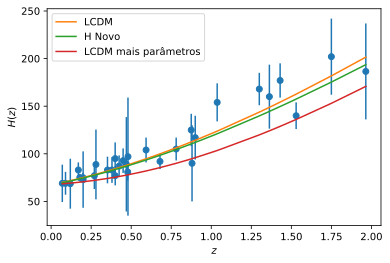

In [11]:
#Gráfico com todos juntos

myfile_H = pd.read_csv(r'/home/cordoeira/Documentos/Dados_Planck/H(z).txt', header = None,sep='\s\s+',engine='python')

myfile_H.columns = ['z','H','error_H']

Hdata = pd.DataFrame(myfile_H)
print(Hdata)

fig1 = plt.figure()
xdata = Hdata["z"]
ydata = Hdata["H"]
errordata = Hdata["error_H"]
plt.scatter(xdata, ydata)
plt.errorbar(xdata, ydata, errordata, linestyle = "None")
#plt.plot(xdata, H_z(xdata, 67.36, 0.311))
plt.plot(xdata, H_LCDM(xdata, 0.311), label = 'LCDM')
plt.plot(xdata, H_Novo(xdata, 0.311, 0.1), label = 'H Novo')
plt.plot(xdata, H_LCDM1(xdata, 67.66, 0.311, 1), label = 'LCDM mais parâmetros')
#plt.title('$H_0$ = 67.36, $\Omega_{m0} = 0.311$, $\lambda$ = 0.1')
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.legend()
#plt.legend(["LCDM "],loc = "upper left")
#plt.legend(['H_Novo'], loc = "upper left")
#plt.legend(['H_LCDM mias parâmetros'], loc = "upper left")
#fig = plt.gcf()
plt.show()
#fig1.savefig("H(z)_data.png")
#plt.savefig('H(z)_data.png', format = 'png')
#print("figuraH")


In [28]:
# Chi Quadrado para comparaçao do LCDM:


myfile_H = pd.read_csv(r'/home/cordoeira/Documentos/Dados_Planck/H(z).txt', header = None,sep='\s\s+',engine='python')

myfile_H.columns = ['z','H','error_H']

Hdata = pd.DataFrame(myfile_H)

H_obs = Hdata["H"]
z_dado = Hdata["z"]
sigma_OHD = Hdata["error_H"]
#Omega_m0 = 0.311

#print(H_obs)


In [33]:
#for z in np.linspace (0, 1):
   # print(H_LCDM(z, 0.311))
    
#print(H_LCDM(z_dado, 0.311))

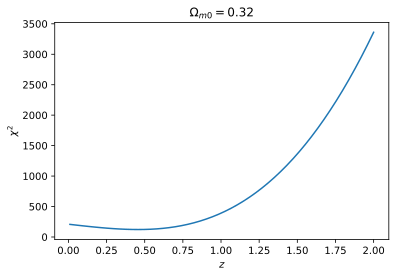

In [29]:
#print(H_obs)
#print(H_LCDM(z_dado, 0.311) - H_obs)
#print(sigma_OHD)


def chisqfunc(z_dado,Omega_m0):
    model = H_LCDM(z_dado,Omega_m0)
    chisq2 = np.sum(((H_obs - model)/sigma_OHD)**2)
    return chisq2



#loop variando zdata
chi2=[]
for par in np.linspace(0.01,2):
    chi2.append(chisqfunc(par,0.31))

#or
    
plt.plot(np.linspace(.01,2),chi2)
plt.title('$\Omega_{m0}=0.32$') #adicionando o título
plt.xlabel('$z$')
plt.ylabel('$\chi^2$')
plt.show()

In [47]:
def log_likelihood(theta, xdata, ydata, errordata):
    #m, b= theta
    H0, Omega_m0 = theta  # Theta representa o grupo de parâmetros do modelo
    model = H_LCDM_Free(xdata, H0, Omega_m0)
    #model = m * x + b
    #sigma2 = yerr * 2 + model * 2 * np.exp(2 * log_f)
    sigma2 = errordata ** 2 
    chi= (ydata - model)**2/sigma2
   #return -0.5 * np.sum((ydata - model) ** 2 / sigma2 + np.log(sigma2))
    return -0.5 * np.sum(chi ** 2 + np.log(sigma2))

In [53]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([70, 0.4])
soln = minimize(nll, initial, args=(xdata, ydata, errordata))
H0_ml, Omega_ml = soln.x
#Omega_Ll = 1 - Omega_ml 

print("Maximum likelihood estimates:")
print(H0_ml, Omega_ml, 1 - Omega_ml)
#print(Omega_Ll)


Maximum likelihood estimates:
69.59571686212082 0.2920345254986201 0.7079654745013799


In [41]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
soln = minimize(nll, 1, args=(xdata, ydata, errordata))
Omega_ml = soln.x

print("Maximum likelihood estimates:")
print(Omega_ml, 1 - Omega_ml)

Maximum likelihood estimates:
[0.31614171] [0.68385829]


In [46]:
def chisqfunc1(z_dado,Omega_m0, alpha):
    model = H_Novo(z_dado,Omega_m0, alpha)
    chisq2 = np.sum(((H_obs - model)/sigma_OHD)**2)
    return chisq21



def log_likelihood1(theta, xdata, ydata, errordata):
    #m, b= theta
    Omega_m0, alpha = theta  # Theta representa o grupo de parâmetros do modelo
    model = H_Novo(xdata,Omega_m0, alpha)
    #model = m * x + b
    #sigma2 = yerr * 2 + model * 2 * np.exp(2 * log_f)
    sigma2 = errordata ** 2 
    chi= (ydata - model)**2/sigma2
   #return -0.5 * np.sum((ydata - model) ** 2 / sigma2 + np.log(sigma2))
    return -0.5 * np.sum(chi  + np.log(sigma2))

def log_likelihood2(theta, xdata, ydata, errordata):
    #m, b= theta
    H0, Omega_m0, alpha = theta  # Theta representa o grupo de parâmetros do modelo
    model = H_Novo_Free(xdata, H0, Omega_m0, alpha)
    #model = m * x + b
    #sigma2 = yerr * 2 + model * 2 * np.exp(2 * log_f)
    sigma2 = errordata ** 2 
    chi= (ydata - model)**2/sigma2
   #return -0.5 * np.sum((ydata - model) ** 2 / sigma2 + np.log(sigma2))
    return -0.5 * np.sum(chi  + np.log(sigma2))

In [40]:
from scipy.optimize import minimize



np.random.seed(42)
nll = lambda *args: -log_likelihood1(*args)
initial = np.array([0.2, 0.3])
soln = minimize(nll, initial, args=(xdata, ydata, errordata))
Omega_ml, alpha_ml = soln.x

print("Maximum likelihood estimates:")
print(Omega_ml, alpha_ml, 1 - Omega_ml)

Maximum likelihood estimates:
0.33208205553100845 0.02749858531686094 0.6679179444689916


In [55]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood2(*args)
initial = np.array([70, 0.2, 0.3])
soln = minimize(nll, initial, args=(xdata, ydata, errordata))
H0_ml, Omega_ml, alpha_ml = soln.x

print("Maximum likelihood estimates:")
print(H0_ml, Omega_ml, alpha_ml, 1 - Omega_ml)

Maximum likelihood estimates:
68.48215767181522 0.30359911171494147 -0.07099337477981169 0.6964008882850585
